# AO3

In [1]:
import requests

In [2]:
from bs4 import BeautifulSoup

In [144]:
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm

In [100]:
import pandas as pd
import numpy as np

In [173]:
def graficosTagsAO3(Cant=0, Tag='Childhood%20Friends', Freq='Daily'):
  url = 'https://archiveofourown.org/tags/{}/works'.format(Tag)
  page = requests.get(url)
  soup = BeautifulSoup(page.text, 'html.parser')
  if Cant == 0 :
    count = soup.find_all("ol", class_="pagination actions")[0].get_text().split(' ')[-3]
  else: 
    count = Cant
  dicc = {}
  for i in tqdm(range(1, int(count))):
    url = 'https://archiveofourown.org/tags/'+Tag+'/works?page='+str(i)
    page = requests.get(url)
    soup = BeautifulSoup(page.text, 'html.parser')
    for el in soup.find_all("p", class_="datetime"):
      if Freq == 'Daily':
        eltext = el.get_text().replace(' Jan ', "/1/").replace(' Feb ', "/2/").replace(' Mar ', "/3/").replace(' Apr ', "/4/").replace(' May ', "/5/").replace(' Jun ', "/6/").replace(' Jul ', "/7/").replace(' Aug ', "/8/").replace(' Sep ', "/9/").replace(' Oct ', "/10/").replace(' Nov ', "/11/").replace(' Dec ', "/12/")
      else:
        eltext = el.get_text()[-9:].replace(' Jan ', "1/").replace(' Feb ', "2/").replace(' Mar ', "3/").replace(' Apr ', "4/").replace(' May ', "5/").replace(' Jun ', "6/").replace(' Jul ', "7/").replace(' Aug ', "8/").replace(' Sep ', "9/").replace(' Oct ', "10/").replace(' Nov ', "11/").replace(' Dec ', "12/")
      if eltext in dicc:
        dicc[eltext] += 1
      else:
        dicc[eltext] = 1
  print(dicc)
  lists =reversed(dicc.items()) # sorted by key, return a list of tuples
  x, y = zip(*lists) # unpack a list of pairs into two tuples
  fig, ax = plt.subplots(1,1) 
  ax.plot(x,y)
  # Set number of ticks for x-axis
  ax.set_xticks(x)
  # Set ticks labels for x-axis
  ax.xaxis.set_major_locator(plt.MaxNLocator(6))
  plt.title(f"Posted Fanfictions of {Tag.replace('%20',' ').replace('*s*','/').replace('%7C', '|')} {Freq} on AO3")
  plt.show()
  return dicc

100%|██████████| 83/83 [01:27<00:00,  1.05s/it]


{'1/2023': 46, '12/2022': 24, '11/2022': 21, '10/2022': 27, '9/2022': 26, '8/2022': 26, '7/2022': 30, '6/2022': 23, '5/2022': 32, '4/2022': 27, '3/2022': 29, '2/2022': 26, '1/2022': 45, '12/2021': 41, '11/2021': 30, '10/2021': 41, '9/2021': 35, '8/2021': 48, '7/2021': 31, '6/2021': 43, '5/2021': 54, '4/2021': 50, '3/2021': 54, '2/2021': 46, '1/2021': 67, '12/2020': 50, '11/2020': 40, '10/2020': 41, '9/2020': 29, '8/2020': 40, '7/2020': 48, '6/2020': 39, '5/2020': 24, '4/2020': 24, '3/2020': 26, '2/2020': 20, '1/2020': 33, '12/2019': 36, '11/2019': 16, '10/2019': 36, '9/2019': 18, '8/2019': 10, '7/2019': 16, '6/2019': 15, '5/2019': 19, '4/2019': 4, '3/2019': 12, '2/2019': 10, '1/2019': 16, '12/2018': 7, '11/2018': 4, '10/2018': 7, '9/2018': 4, '7/2018': 4, '4/2018': 1, '2/2017': 1}


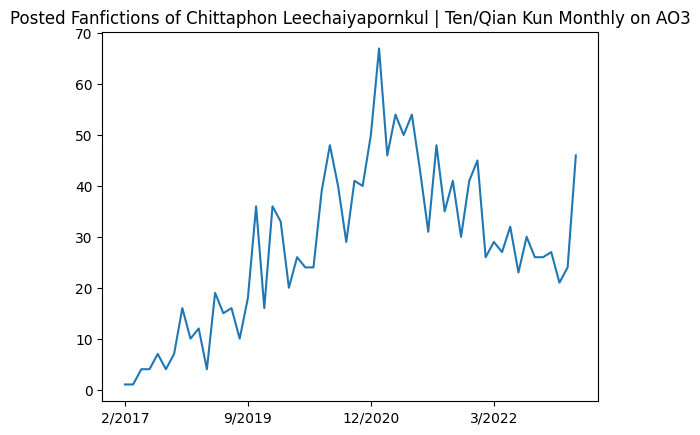

In [132]:
d = graficosTagsAO3(Cant=83, Tag='Chittaphon%20Leechaiyapornkul%20%7C%20Ten*s*Qian%20Kun', Freq='Monthly')

100%|██████████| 17/17 [00:16<00:00,  1.01it/s]


{'1/2023': 1, '12/2022': 4, '7/2022': 1, '3/2022': 1, '2/2022': 2, '1/2022': 2, '12/2021': 1, '10/2021': 1, '7/2021': 1, '6/2021': 1, '5/2021': 2, '4/2021': 1, '11/2020': 1, '8/2020': 1, '7/2020': 2, '5/2020': 1, '3/2020': 2, '2/2020': 3, '1/2020': 2, '12/2019': 1, '10/2019': 2, '9/2019': 2, '7/2019': 1, '6/2019': 1, '5/2019': 1, '4/2019': 1, '3/2019': 1, '2/2019': 1, '1/2019': 3, '12/2018': 4, '11/2018': 4, '9/2018': 1, '8/2018': 1, '7/2018': 2, '6/2018': 4, '5/2018': 1, '4/2018': 5, '3/2018': 2, '2/2018': 5, '1/2018': 3, '12/2017': 6, '11/2017': 4, '10/2017': 1, '9/2017': 8, '8/2017': 3, '7/2017': 5, '6/2017': 8, '5/2017': 10, '4/2017': 4, '3/2017': 8, '2/2017': 10, '1/2017': 18, '12/2016': 6, '11/2016': 5, '10/2016': 5, '9/2016': 5, '8/2016': 3, '7/2016': 24, '6/2016': 10, '5/2016': 4, '4/2016': 2, '3/2016': 4, '2/2016': 2, '1/2016': 3, '12/2015': 7, '11/2015': 6, '10/2015': 5, '9/2015': 5, '8/2015': 1, '7/2015': 1, '6/2015': 7, '5/2015': 4, '4/2015': 8, '3/2015': 2, '2/2015': 4, '1

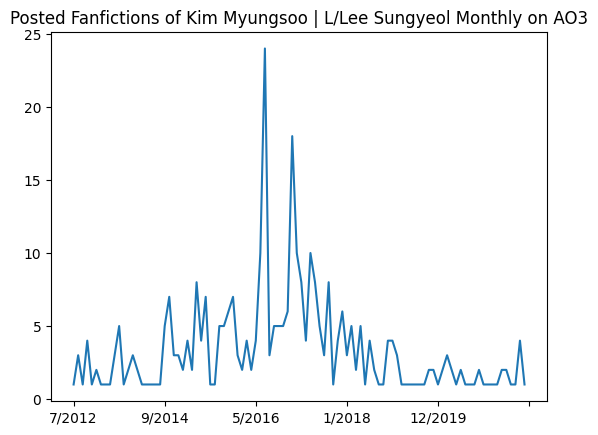

In [174]:
d = graficosTagsAO3(Cant=18, Tag='Kim%20Myungsoo%20%7C%20L*s*Lee%20Sungyeol', Freq='Monthly')

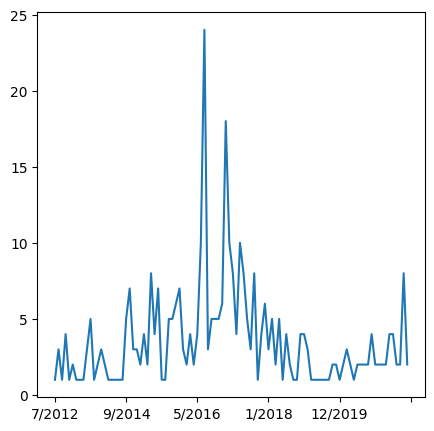

In [170]:
lists =reversed(d.items()) # sorted by key, return a list of tuples
x, y = zip(*lists) # unpack a list of pairs into two tuples
fig, ax = plt.subplots(figsize=(5, 5))
ax.plot(x,y)
# Set number of ticks for x-axis
ax.set_xticks(x)
# Set ticks labels for x-axis
ax.xaxis.set_major_locator(plt.MaxNLocator(6))
# plt.title(f"Posted Fanfictions of {Tag.replace('%20',' ').replace('*s*','/').replace('%7C', '|')} {Freq} on AO3")
# plt.show()